## Machine Failure Project

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [4]:
import pandas as pd 
df = pd.read_csv("train.csv")
df.head

<bound method NDFrame.head of             id Product ID Type  Air temperature [K]  Process temperature [K]  \
0            0     L50096    L                300.6                    309.6   
1            1     M20343    M                302.6                    312.1   
2            2     L49454    L                299.3                    308.5   
3            3     L53355    L                301.0                    310.9   
4            4     M24050    M                298.0                    309.0   
...        ...        ...  ...                  ...                      ...   
136424  136424     M22284    M                300.1                    311.4   
136425  136425     H38017    H                297.5                    308.5   
136426  136426     L54690    L                300.5                    311.8   
136427  136427     L53876    L                301.7                    310.9   
136428  136428     L47937    L                296.9                    308.1   

        R

In [5]:
df.info

<bound method DataFrame.info of             id Product ID Type  Air temperature [K]  Process temperature [K]  \
0            0     L50096    L                300.6                    309.6   
1            1     M20343    M                302.6                    312.1   
2            2     L49454    L                299.3                    308.5   
3            3     L53355    L                301.0                    310.9   
4            4     M24050    M                298.0                    309.0   
...        ...        ...  ...                  ...                      ...   
136424  136424     M22284    M                300.1                    311.4   
136425  136425     H38017    H                297.5                    308.5   
136426  136426     L54690    L                300.5                    311.8   
136427  136427     L53876    L                301.7                    310.9   
136428  136428     L47937    L                296.9                    308.1   

       

In [6]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [10]:
s = df.duplicated().sum()
s

0

In [9]:
s[s>0]

array([], dtype=int64)

## Seperate X and Y features

In [11]:
X = df.drop(columns=['Machine failure', 'id', 'Product ID'])
Y = df[['Machine failure']]

In [12]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [13]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [28]:
X.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

## Cat Con seperation for X

In [14]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [15]:
cat

['Type']

In [16]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Create a preprocessing pipeline for X

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [31]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Type'])])

In [20]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [22]:
cols = pre.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [23]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Apply Train test split


In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [33]:
xtrain.shape

(95500, 13)

In [34]:
xtest.shape

(40929, 13)

In [35]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
58494,1.469856,0.331317,-0.744803,0.958735,1.478799,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
75360,-0.516999,0.475704,-0.636684,0.229512,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
131485,-0.141107,-0.823778,-1.025912,0.241274,-0.741172,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
45948,0.073688,0.403510,-0.024010,0.488269,-0.334698,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
105004,0.181085,-0.101844,3.752944,-2.487432,0.650218,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0


In [36]:

ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [37]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,0.0,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [38]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [39]:
ytrain.value_counts()

Machine failure
0                  93985
1                   1515
Name: count, dtype: int64

In [40]:
ytest.value_counts()

Machine failure
0                  40296
1                    633
Name: count, dtype: int64

### Create a random forest model

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='gini')
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1)

In [42]:
model.score(xtrain, ytrain)

0.9893298429319372

In [43]:
model.score(xtest, ytest)

0.989322973930465

### Randomized search cv is faster compared to gridsearchcv


In [44]:
params = {'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9],
          'criterion':['gini', 'entropy']}

In [45]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [46]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'max_depth': 7,
 'criterion': 'gini'}

In [47]:
rscv.best_score_

0.9318005274402947

In [48]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=50)

### Evaluate Model in train and test

In [49]:
best_rfc.score(xtrain, ytrain)

0.9962408376963351

In [50]:
best_rfc.score(xtest, ytest)

0.9961396564782917

### Predict results for train and test

In [51]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [52]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [53]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [54]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [55]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### Create confusion matrix for test results

In [56]:
best_rfc.classes_

array([0, 1], dtype=int64)

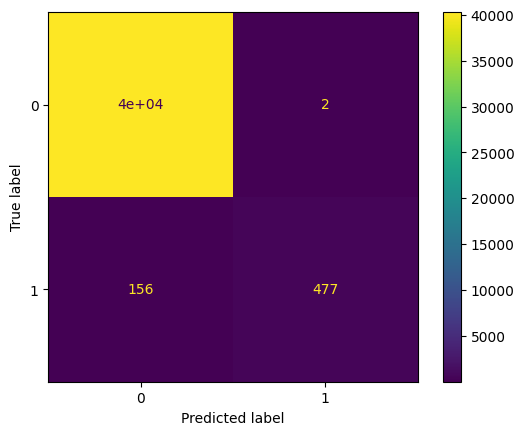

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

### Create a classification report

In [58]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       1.00      0.75      0.86       633

    accuracy                           1.00     40929
   macro avg       1.00      0.88      0.93     40929
weighted avg       1.00      1.00      1.00     40929



### Predict probabilites

In [59]:
yprob_tr = best_rfc.predict_proba(xtrain)
yprob_ts = best_rfc.predict_proba(xtest)

In [60]:
best_rfc.classes_

array([0, 1], dtype=int64)

In [61]:
yprob_ts[0:5]

array([[0.19726681, 0.80273319],
       [0.99687937, 0.00312063],
       [0.99685938, 0.00314062],
       [0.99718179, 0.00281821],
       [0.99538871, 0.00461129]])

In [62]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

### Feature importances

In [63]:
imp = best_rfc.feature_importances_
imp

array([1.56883373e-02, 5.89053842e-03, 3.55567795e-02, 5.73788670e-02,
       1.08800871e-02, 9.97329121e-02, 3.56907715e-01, 1.43873313e-01,
       2.72175687e-01, 1.00440749e-05, 2.80204371e-04, 1.11007211e-03,
       5.15443135e-04])

In [64]:
xtrain.columns

Index(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF', 'num__OSF',
       'num__RNF', 'cat__Type_H', 'cat__Type_L', 'cat__Type_M'],
      dtype='object')

In [65]:
imp = pd.Series(imp)
imp

0     0.015688
1     0.005891
2     0.035557
3     0.057379
4     0.010880
5     0.099733
6     0.356908
7     0.143873
8     0.272176
9     0.000010
10    0.000280
11    0.001110
12    0.000515
dtype: float64

In [66]:
imp.index = xtrain.columns
imp

num__Air temperature [K]        0.015688
num__Process temperature [K]    0.005891
num__Rotational speed [rpm]     0.035557
num__Torque [Nm]                0.057379
num__Tool wear [min]            0.010880
num__TWF                        0.099733
num__HDF                        0.356908
num__PWF                        0.143873
num__OSF                        0.272176
num__RNF                        0.000010
cat__Type_H                     0.000280
cat__Type_L                     0.001110
cat__Type_M                     0.000515
dtype: float64

In [67]:
imp = imp.sort_values(ascending=False)
imp

num__HDF                        0.356908
num__OSF                        0.272176
num__PWF                        0.143873
num__TWF                        0.099733
num__Torque [Nm]                0.057379
num__Rotational speed [rpm]     0.035557
num__Air temperature [K]        0.015688
num__Tool wear [min]            0.010880
num__Process temperature [K]    0.005891
cat__Type_L                     0.001110
cat__Type_M                     0.000515
cat__Type_H                     0.000280
num__RNF                        0.000010
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

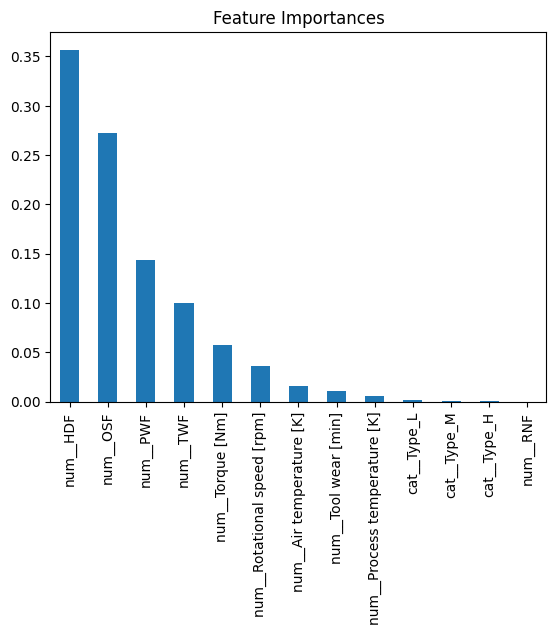

In [68]:
imp.plot(kind='bar', title='Feature Importances')

### Predicting Out of sample data


In [70]:
xnew = pd.read_csv('test.csv')
xnew

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [71]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


### Always apply pre.transform


In [72]:
xnew_pre = pre.transform(xnew)
xnew_pre[0:5]

array([[ 1.30875929,  1.12544438, -0.15375311, -0.27623953, -0.69427087,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         0.        ,  1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , -1.35831267, -1.36651555,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         0.        ,  1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, -0.31152452, -0.13146138,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         0.        ,  1.        ,  0.        ],
       [ 0.12738648, -0.24623038, -0.29791167,  0.85288028, -1.55411871,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         0.        ,  0.        ,  1.        ],
       [ 1.8994457 ,  1.70299165, -0.03842626,  0.11189541,  0.14994337,
        -0.03945048, -0.07202055, -0.04901642, -0.06303833, -0.04756777,
         0.        ,  0.        ,  1.        ]])

In [73]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,1.308759,1.053251,-0.261872,0.006040,-1.397783,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90950,-1.053986,-0.101844,0.156188,-0.770229,-1.147645,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90951,-2.289058,-2.700806,-0.139337,0.123657,1.291196,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90952,-0.946589,-1.545712,0.098524,-0.005721,-0.553568,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


### Predict the results with probability


In [74]:
pred = best_rfc.predict(xnew_pre)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
prob = best_rfc.predict_proba(xnew_pre)
prob

array([[0.99522756, 0.00477244],
       [0.99649499, 0.00350501],
       [0.99685938, 0.00314062],
       ...,
       [0.99670713, 0.00329287],
       [0.99723138, 0.00276862],
       [0.99522756, 0.00477244]])

In [76]:
import numpy as np 
prob_max = np.max(prob, axis=1)
prob_max

array([0.99522756, 0.99649499, 0.99685938, ..., 0.99670713, 0.99723138,
       0.99522756])

### Save above probabilities and preds in xnew


In [77]:
xnew['Machine Failure_pred']=pred 
xnew['Machine Failure_prob']=prob_max

In [78]:
xnew

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine Failure_pred,Machine Failure_prob
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,0.995228
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,0.996495
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,0.996859
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,0.997237
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,0.994694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0,0,0.995228
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0,0,0.996923
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0,0,0.996707
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0,0,0.997231


In [79]:
xnew['Machine Failure_pred'].value_counts()

Machine Failure_pred
0    89853
1     1101
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for out of sample predictions'}, xlabel='Machine Failure_pred'>

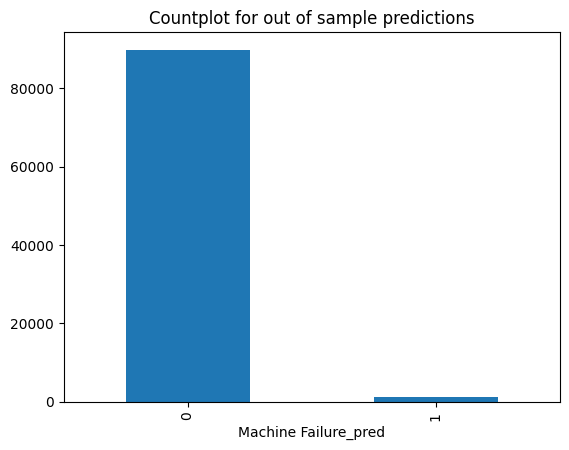

In [80]:
xnew['Machine Failure_pred'].value_counts().plot(kind='bar', title='Countplot for out of sample predictions')

## Save above results to csv


In [81]:
xnew.to_csv('Results.csv', index=False)